Practical No.12
Title:
Celebrity Face Classification using Convolutional Neural Network (CNN)

Celebrities: ['Angelina Jolie', 'Brad Pitt', 'Denzel Washington', 'Hugh Jackman', 'Jennifer Lawrence', 'Johnny Depp', 'Kate Winslet', 'Leonardo DiCaprio', 'Megan Fox', 'Natalie Portman', 'Nicole Kidman', 'Robert Downey Jr', 'Sandra Bullock', 'Scarlett Johansson', 'Tom Cruise', 'Tom Hanks', 'Will Smith']
Dataset Shape: (1800, 128, 128, 3) (1800,)
Training data shape: (1440, 128, 128, 3)
Testing data shape: (360, 128, 128, 3)


C:\Users\anush\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 17)             │         2,193 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,394,513 (28.21 MB)

 Trainable params: 7,394,513 (28.21 MB)

 Non-trainable params: 0 (0.00 B)

C:\Users\anush\AppData\Roaming\Python\Python313\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 9s 166ms/step - accuracy: 0.0875 - loss: 2.9455 - val_accuracy: 0.1111 - val_loss: 2.7865
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 7s 157ms/step - accuracy: 0.1139 - loss: 2.7882 - val_accuracy: 0.1222 - val_loss: 2.7541
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 7s 163ms/step - accuracy: 0.1187 - loss: 2.7365 - val_accuracy: 0.1278 - val_loss: 2.6541
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 14s 317ms/step - accuracy: 0.1368 - loss: 2.6767 - val_accuracy: 0.1583 - val_loss: 2.6882
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 10s 217ms/step - accuracy: 0.1361 - loss: 2.6669 - val_accuracy: 0.1750 - val_loss: 2.6204
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 10s 219ms/step - accuracy: 0.1625 - loss: 2.5671 - val_accuracy: 0.2139 - val_loss: 2.4766
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 21s 466ms/step - accuracy: 0.1757 - loss: 2.5373 - val_accuracy: 0.2028 - val_loss: 2.4480
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 20s 442ms/step - accuracy: 0.1833 - loss: 2.5234 - val_accurac

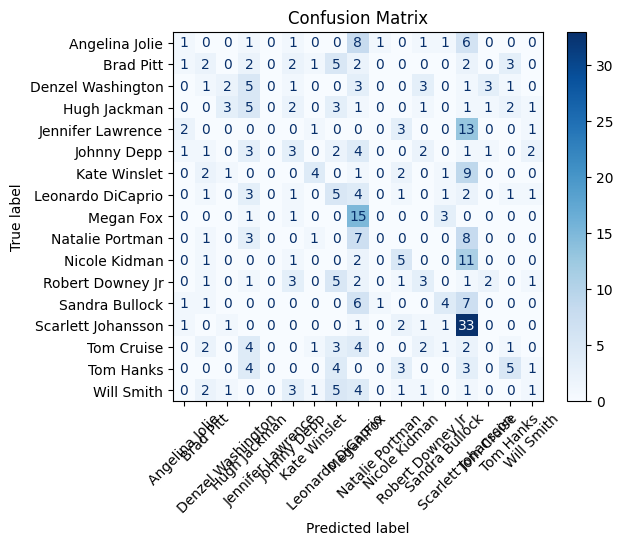

In [4]:
# --------------------------------------------------------------
# 1. Import Libraries
# --------------------------------------------------------------
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# --------------------------------------------------------------
# 2. Load Dataset
# --------------------------------------------------------------
data_dir = r"D:\ML assi1-12\ML\CelebrityFaces"  # 🔹 Change this to your dataset path
categories = os.listdir(data_dir)
print("Celebrities:", categories)

images = []
labels = []

# Load images and assign numeric labels
for i, category in enumerate(categories):
    folder_path = os.path.join(data_dir, category)
    for img_file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_file)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (128, 128))  # Resize for uniformity
            images.append(img)
            labels.append(i)

# Convert to numpy arrays
X = np.array(images)
y = np.array(labels)
print("Dataset Shape:", X.shape, y.shape)

# --------------------------------------------------------------
# 3. Split into Training and Testing Sets
# --------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --------------------------------------------------------------
# 4. Normalize Data & One-Hot Encode Labels
# --------------------------------------------------------------
X_train = X_train / 255.0
X_test = X_test / 255.0

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

# --------------------------------------------------------------
# 5. Initialize & Build CNN Model
# --------------------------------------------------------------
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),

    Dense(len(categories), activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# --------------------------------------------------------------
# 6. Data Augmentation
# --------------------------------------------------------------
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
datagen.fit(X_train)

# --------------------------------------------------------------
# 7. Train Model
# --------------------------------------------------------------
history = model.fit(
    datagen.flow(X_train, y_train_cat, batch_size=32),
    validation_data=(X_test, y_test_cat),
    epochs=10,
    verbose=1
)

# --------------------------------------------------------------
# 8. Evaluate Model
# --------------------------------------------------------------
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"\n✅ Test Accuracy: {test_acc * 100:.2f}%")

# --------------------------------------------------------------
# 9. Confusion Matrix
# --------------------------------------------------------------
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=categories)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()
